In [5]:
from tqdm import tqdm
import sys
import yaml
from pathlib import Path
from easydict import EasyDict
import numpy as np

from pcdet.datasets import KittiDataset

import pandas_profiling
import pandas as pd

from matplotlib.ticker import PercentFormatter
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()

In [6]:
dataset_cfg_dir = '/mnt/data/shag01/kitti_stats/OpenPCDet/tools/cfgs/dataset_configs/kitti_dataset.yaml'
pcdet_root_dir = Path('/mnt/data/shag01/kitti_stats/OpenPCDet/')
save_plots_dir = '/mnt/data/shag01/kitti_stats/OpenPCDet/kitti_stats'
class_names = ['Car', 'Pedestrian', 'Cyclist']

In [7]:
dataset_cfg = EasyDict(yaml.load(open(dataset_cfg_dir)))
data_path = pcdet_root_dir / 'data' / 'kitti'
save_path = pcdet_root_dir / 'data' / 'kitti'

/tmp/ipykernel_39942/2781967634.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dataset_cfg = EasyDict(yaml.load(open(dataset_cfg_dir)))


In [8]:
kitti_train = KittiDataset(dataset_cfg=dataset_cfg, class_names=class_names, root_path=data_path)
infos_train = kitti_train.get_infos()

train sample_idx: 000000
train sample_idx: 000003
train sample_idx: 000007
train sample_idx: 000009
train sample_idx: 000010
train sample_idx: 000011
train sample_idx: 000012
train sample_idx: 000013
train sample_idx: 000014
train sample_idx: 000016
train sample_idx: 000017
train sample_idx: 000018
train sample_idx: 000022
train sample_idx: 000026
train sample_idx: 000029
train sample_idx: 000030
train sample_idx: 000032
train sample_idx: 000034
train sample_idx: 000036
train sample_idx: 000038
train sample_idx: 000041
train sample_idx: 000043
train sample_idx: 000044
train sample_idx: 000045
train sample_idx: 000046
train sample_idx: 000049
train sample_idx: 000051
train sample_idx: 000054
train sample_idx: 000055
train sample_idx: 000056
train sample_idx: 000057
train sample_idx: 000060
train sample_idx: 000064
train sample_idx: 000067
train sample_idx: 000068
train sample_idx: 000069
train sample_idx: 000070
train sample_idx: 000071
train sample_idx: 000072
train sample_idx: 000073


In [6]:
# kitti_val = KittiDataset(dataset_cfg=dataset_cfg, class_names=class_names, training=False, root_path=data_path)
# infos_val = kitti_val.get_infos()
# infos = infos_train + infos_val
# len(infos)

val sample_idx: 000001
val sample_idx: 000002
val sample_idx: 000004
val sample_idx: 000005
val sample_idx: 000006
val sample_idx: 000008
val sample_idx: 000015
val sample_idx: 000019
val sample_idx: 000020
val sample_idx: 000021
val sample_idx: 000023
val sample_idx: 000024
val sample_idx: 000025
val sample_idx: 000027
val sample_idx: 000028
val sample_idx: 000031
val sample_idx: 000033
val sample_idx: 000035
val sample_idx: 000037
val sample_idx: 000039
val sample_idx: 000040
val sample_idx: 000042
val sample_idx: 000047
val sample_idx: 000048
val sample_idx: 000050
val sample_idx: 000052
val sample_idx: 000053
val sample_idx: 000058
val sample_idx: 000059
val sample_idx: 000061
val sample_idx: 000062
val sample_idx: 000063
val sample_idx: 000065
val sample_idx: 000066
val sample_idx: 000076
val sample_idx: 000077
val sample_idx: 000078
val sample_idx: 000081
val sample_idx: 000089
val sample_idx: 000090
val sample_idx: 000093
val sample_idx: 000094
val sample_idx: 000098
val sample_

In [9]:
per_img_infos = []
per_obj_infos = []

for info in tqdm(infos_train):
    
    annos = info['annos']
    num_gts = annos['gt_boxes_lidar'].shape[0]
    
    lidar_idx = info['point_cloud']['lidar_idx']
    
    img_info = {}
    img_info['lidar_idx'] = lidar_idx
    img_info['num_gts'] = num_gts
    img_info['img_height'] = info['image']['image_shape'][0]
    img_info['img_width'] = info['image']['image_shape'][1]
        
    for i in range(num_gts):
        obj_info = {}
        obj_info['lidar_idx'] = lidar_idx
        
        
        for key, val in annos.items():
            if val.ndim == 2:  # split columns with 2D elements
                for j in range(val.shape[-1]):
                    new_key = key + f'_{j}'
                    obj_info[new_key] = val[i, j]
            else:
                obj_info[key] = val[i]
            
        per_obj_infos.append(obj_info)
    
    per_img_infos.append(img_info)

100%|██████████| 3712/3712 [00:00<00:00, 9561.01it/s]


In [10]:
per_obj_infos[0]

{'lidar_idx': '000000',
 'name': 'Pedestrian',
 'truncated': 0.0,
 'occluded': 0.0,
 'alpha': -0.2,
 'bbox_0': 712.4,
 'bbox_1': 143.0,
 'bbox_2': 810.73,
 'bbox_3': 307.92,
 'dimensions_0': 1.2,
 'dimensions_1': 1.89,
 'dimensions_2': 0.48,
 'location_0': 1.84,
 'location_1': 1.47,
 'location_2': 8.41,
 'rotation_y': 0.01,
 'score': -1.0,
 'difficulty': 0,
 'index': 0,
 'gt_boxes_lidar_0': 8.731380462646484,
 'gt_boxes_lidar_1': -1.8559175729751587,
 'gt_boxes_lidar_2': -0.6546993851661682,
 'gt_boxes_lidar_3': 1.2,
 'gt_boxes_lidar_4': 0.48,
 'gt_boxes_lidar_5': 1.89,
 'gt_boxes_lidar_6': -1.5807963267948966,
 'num_points_in_gt': 377}

In [11]:
per_img_infos_pd = pd.DataFrame.from_dict(per_img_infos)
per_obj_infos_pd = pd.DataFrame.from_dict(per_obj_infos)
new_colnames = ['lidar_idx', 'name', 'truncated', 'occluded', 'alpha (radian)', 'bbox_left (pixel)',
                'bbox_top (pixel)', 'bbox_right (pixel)', 'bbox_bottom (pixel)', 'dimensions_height (meters)',
                'dimensions_width (meters)', 'dimensions_length (meters)', 'location_x (meter)',
                'rotation_y (meters)', 'rotation_z (meters)', 'rotation_y (radian)', 'score', 'difficulty', 'index',
                'loc_x (meter)', 'loc_y (meter)', 'loc_z (meter)', 'dim_x (meter)', 'dim_y (meter)',
                'dim_z (meter)', 'rotation_y_lidar (radian)', 'num_points_in_gt']
per_obj_infos_pd.columns = new_colnames
per_obj_infos_pd = per_obj_infos_pd.drop(columns=['lidar_idx', 'index'])
report_img = pandas_profiling.ProfileReport(per_img_infos_pd, minimal=True)
report_obj = pandas_profiling.ProfileReport(per_obj_infos_pd, minimal=True)

In [12]:
area = per_obj_infos_pd['dimensions_height (meters)'] * per_obj_infos_pd['dimensions_width (meters)']
per_obj_infos_pd['area (meter^2)'] = area
width = per_obj_infos_pd['bbox_right (pixel)'] - per_obj_infos_pd['bbox_left (pixel)']
height = per_obj_infos_pd['bbox_bottom (pixel)'] - per_obj_infos_pd['bbox_top (pixel)']
per_obj_infos_pd['dimensions_height (pixels)'] = height
per_obj_infos_pd['area (pixel^2)'] = height * width

In [13]:
per_obj_infos_pd

,name,truncated,occluded,alpha (radian),bbox_left (pixel),bbox_top (pixel),bbox_right (pixel),bbox_bottom (pixel),dimensions_height (meters),dimensions_width (meters),...,loc_y (meter),loc_z (meter),dim_x (meter),dim_y (meter),dim_z (meter),rotation_y_lidar (radian),num_points_in_gt,area (meter^2),dimensions_height (pixels),area (pixel^2)
0,Pedestrian,0.0,0.0,-0.20,712.400024,143.000000,810.729980,307.920013,1.20,1.89,...,-1.855918,-0.654699,1.20,0.48,1.89,-1.580796,377,2.2680,164.920013,16216.578125
1,Car,0.0,0.0,1.55,614.239990,181.779999,727.309998,284.769989,4.15,1.57,...,-0.981780,-0.909490,4.15,1.73,1.57,-3.190796,674,6.5155,102.989990,11645.079102
2,Car,0.0,0.0,-1.56,564.619995,174.589996,616.429993,224.740005,3.20,1.61,...,0.708958,-0.688423,3.20,1.66,1.61,0.019204,182,5.1520,50.150009,2598.271973
3,Car,0.0,0.0,1.71,481.589996,180.089996,512.549988,202.419998,3.70,1.40,...,7.453393,-0.676632,3.70,1.51,1.40,-3.120796,20,5.1800,22.330002,691.336670
4,Car,0.0,0.0,1.64,542.049988,175.550003,565.270020,193.789993,4.05,1.46,...,4.733361,-0.369830,4.05,1.66,1.46,-3.130796,5,5.9130,18.239990,423.533142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19695,Car,0.0,0.0,2.06,498.890015,186.740005,759.599976,333.700012,3.99,1.46,...,-0.423110,-0.916730,3.99,1.74,1.46,-3.670796,1560,5.8254,146.960007,38313.937500
19696,Car,0.0,1.0,1.82,654.409973,185.960007,752.380005,245.050003,4.29,1.42,...,-2.670077,-0.999280,4.29,1.68,1.42,-3.520796,68,6.0918,59.089996,5789.048828
19697,Car,0.0,2.0,1.76,729.469971,184.250000,786.080017,224.100006,3.80,1.36,...,-5.579149,-0.976757,3.80,1.40,1.36,-3.530796,16,5.1680,39.850006,2255.910645
19698,Van,0.0,1.0,1.60,801.700012,162.110001,837.520020,202.619995,5.64,2.52,...,-13.955256,-0.348510,5.64,2.10,2.52,-3.450796,75,14.2128,40.509995,1451.068359


In [14]:
per_obj_infos_pd.columns

Index(['name', 'truncated', 'occluded', 'alpha (radian)', 'bbox_left (pixel)',
       'bbox_top (pixel)', 'bbox_right (pixel)', 'bbox_bottom (pixel)',
       'dimensions_height (meters)', 'dimensions_width (meters)',
       'dimensions_length (meters)', 'location_x (meter)',
       'rotation_y (meters)', 'rotation_z (meters)', 'rotation_y (radian)',
       'score', 'difficulty', 'loc_x (meter)', 'loc_y (meter)',
       'loc_z (meter)', 'dim_x (meter)', 'dim_y (meter)', 'dim_z (meter)',
       'rotation_y_lidar (radian)', 'num_points_in_gt', 'area (meter^2)',
       'dimensions_height (pixels)', 'area (pixel^2)'],
      dtype='object')

In [15]:
# per_obj_infos_pd.to_pickle(os.path.join(pcdet_root_dir,'kitti_stats/kitti_per_obj_infos_pd'))
per_obj_infos_pd.to_pickle(os.path.join(save_plots_dir, 'kitti_per_obj_infos_pd'))

In [16]:
sep_dfs = {}
for (name, df) in per_obj_infos_pd.groupby('name'):
    sep_dfs[name] = df

In [28]:
kitti_car_length = sep_dfs['Car']['dim_x (meter)']
kitti_car_width = sep_dfs['Car']['dim_y (meter)']
kitti_car_height = sep_dfs['Car']['dim_z (meter)']

kitti_ped_length = sep_dfs['Pedestrian']['dim_x (meter)']
kitti_ped_width = sep_dfs['Pedestrian']['dim_y (meter)']
kitti_ped_height = sep_dfs['Pedestrian']['dim_z (meter)']

kitti_cyc_length = sep_dfs['Cyclist']['dim_x (meter)']
kitti_cyc_width = sep_dfs['Cyclist']['dim_y (meter)']
kitti_cyc_height = sep_dfs['Cyclist']['dim_z (meter)']

print("Car Height min/max:", kitti_car_height.min(), kitti_car_height.max(), 
    "Car Width min/max:", kitti_car_width.min(), kitti_car_width.max(),
    "Car Length min/max:", kitti_car_length.min(), kitti_car_length.max())

print("Ped Height min/max:", kitti_ped_height.min(), kitti_ped_height.max(), 
    "Ped Width min/max:", kitti_ped_width.min(), kitti_ped_width.max(),
    "Ped Length min/max: ", kitti_ped_length.min(), kitti_ped_length.max())

print("Cyc Height min/max :", kitti_cyc_height.min(), kitti_cyc_height.max(), 
    "Cyc Width min/max:", kitti_cyc_width.min(), kitti_cyc_width.max(),
    "Cyc Length min/max: ", kitti_cyc_length.min(), kitti_cyc_length.max())

Car Height min/max: 1.14 2.48 Car Width min/max: 1.14 1.99 Car Length min/max: 2.23 6.67
Ped Height min/max: 1.14 2.01 Ped Width min/max: 0.3 0.94 Ped Length min/max:  0.2 1.28
Cyc Height min/max : 1.41 2.09 Cyc Width min/max: 0.34 0.89 Cyc Length min/max:  1.32 2.17


0.010775325379206916

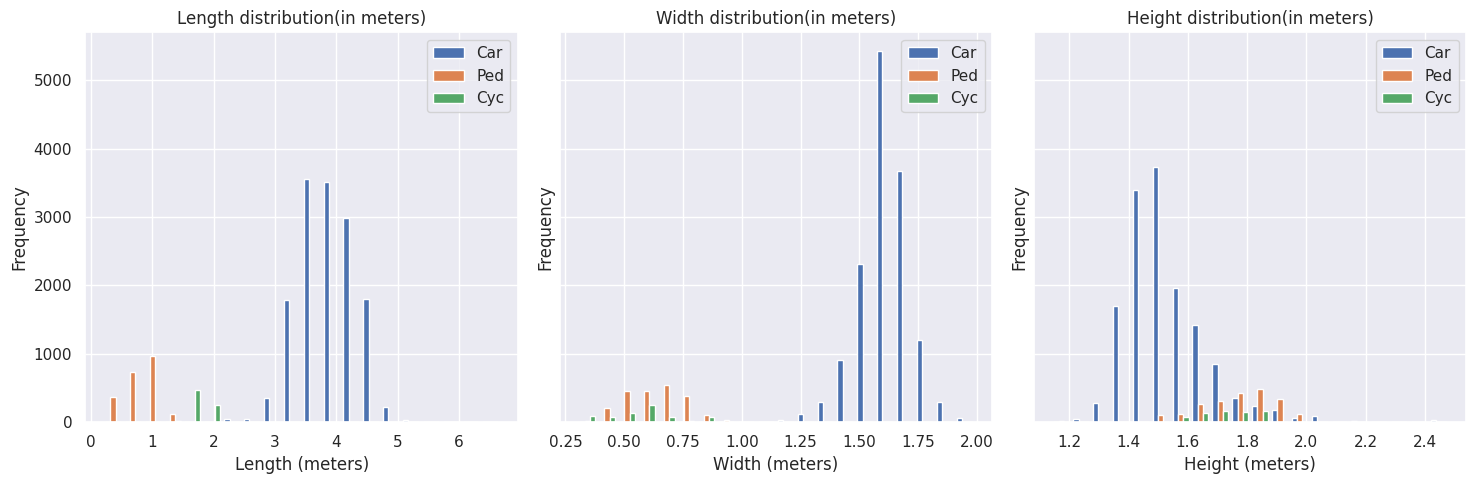

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,5))

# =======================3D Bounding Box Length Distribution=======================
ax1.hist([kitti_car_length, kitti_ped_length, kitti_cyc_length], bins=20, label=['Car', 'Ped', 'Cyc'])
ax1.set_title("Length distribution(in meters)")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Length (meters)")
ax1.legend(loc='upper right')

# =======================3D Bounding Box Width Distribution=======================
ax2.hist([kitti_car_width, kitti_ped_width, kitti_cyc_width], bins=20, label=['Car', 'Ped', 'Cyc'])
ax2.set_title("Width distribution(in meters)")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Width (meters)")
ax2.legend(loc='upper right')

# =======================3D Bounding Box Height Distribution=======================
ax3.hist([kitti_car_height, kitti_ped_height, kitti_cyc_height], bins=20, label=['Car', 'Ped', 'Cyc'])
ax3.set_title("Height distribution(in meters)")
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Height (meters)")
ax3.legend(loc='upper right')

plt.tight_layout()
plt.savefig(os.path.join(save_plots_dir, 'dim_distribution.png'))

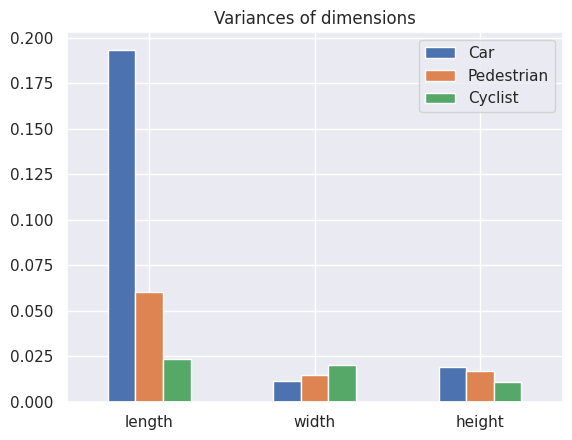

In [52]:
# Variances in dimensions of different classes
from collections import defaultdict
var_dict = defaultdict(dict)

# dim_x - length, dim_y - width, dim_z = height
dimensions = ['dim_x (meter)', 'dim_y (meter)', 'dim_z (meter)']
for class_name in class_names:
    for dim in dimensions:
        var_dict[class_name][dim] = np.var(sep_dfs[class_name][dim])

var_df = pd.DataFrame(var_dict)
ax = var_df.plot(kind='bar', title='Variances of dimensions')
ax.set_xticks([0,1,2], ['length', 'width', 'height'], rotation=0)
ax.figure.savefig(os.path.join(save_plots_dir, "dim_var_distribution.png"))

In [45]:
# Remove extra classes 
for class_name in list(sep_dfs.keys()):
    if class_name not in class_names:
        sep_dfs.pop(class_name)
sep_dfs.keys()

dict_keys(['Car', 'Cyclist', 'Pedestrian'])

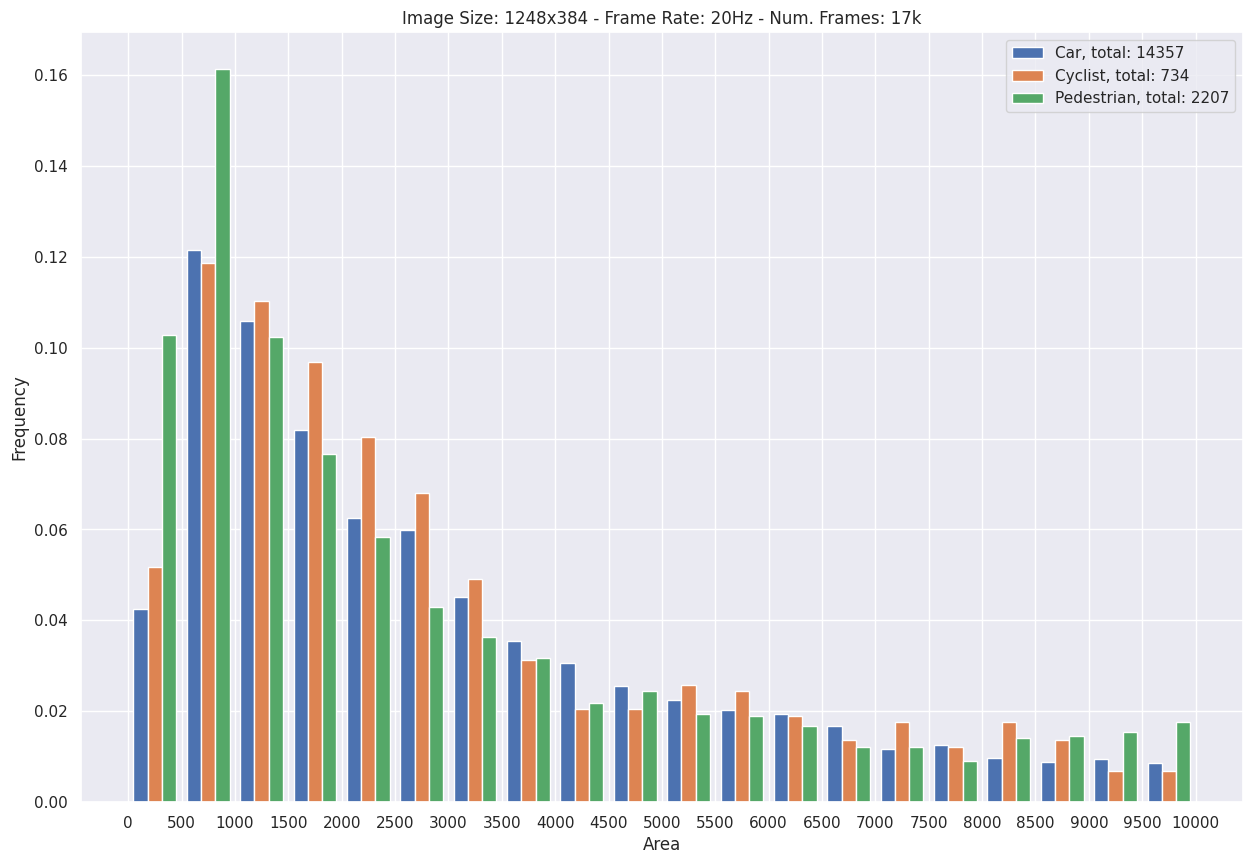

In [46]:
f, ax = plt.subplots(1,1,figsize=(15,10))
vectors = [df['area (pixel^2)'].to_numpy() for df in sep_dfs.values()]
vec_weights = [[] for x in range(len(vectors))]
x_range = (0, 10000)
labels = [k +  ', total: {}'.format(len(v)) for k, v in sep_dfs.items()]
for i in range(len(vectors)):
    if 0 < len(vectors[i]):
        vec_weights[i] = np.ones(len(vectors[i])) / len(vectors[i])
    else:
        vec_weights[i] = 0

# plt.gca().yaxis.set_major_formatter(PercentFormatter(1));
arr, bins, patches = plt.hist(vectors, bins=20, label=labels, weights=vec_weights, range=x_range);
ax.set_xticks(bins)
# ax.set(xlabel='Height')
ax.set(xlabel='Area')
ax.set(ylabel='Frequency')

ax.set_title('Image Size: 1248x384 - Frame Rate: 20Hz - Num. Frames: 17k')
plt.legend()
plt.savefig(os.path.join(save_plots_dir,"area_distribution.png"))